# Titanic Data

# 1.Point out questions

Q：
 What factors made people more likely to survive?
 1. Age
 2. Sex
 3. Pclass


# 2.Data wrangling

In [1]:
#libraries used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data from CSVs

In [2]:
titanic = pd.read_csv('titanic-data.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Fixing Data Types

In [3]:
def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

def parse_maybe_float(i):
    if i == '':
        return None
    else:
        return float(i)

In [4]:
titanic['Fare'].apply(parse_maybe_float)
titanic['Age'].apply(parse_maybe_float)
titanic['Parch'].apply(parse_maybe_int)
titanic['Pclass'].apply(parse_maybe_int)
titanic['SibSp'].apply(parse_maybe_int)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Check Missing Data

In [5]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Conclusion: Age, Cabin and Embarked have missing data 

## Cleaning Missing data

In [6]:
titanic.drop(["Cabin", "Embarked"], axis=1, inplace=True)
titanic.dropna(inplace=True)

##  Check Repeated Name

In [7]:
print len(titanic)
print len(titanic['Name'].unique())

714
714


## Conclusion: the length is same, so there is no repeated name.

# 3.Data analysis

## explore the correlation between survival rate and gender

In [8]:
#calculate survival rates of male and female separately
titanic.groupby("Sex")["Survived"].mean()

Sex
female    0.754789
male      0.205298
Name: Survived, dtype: float64

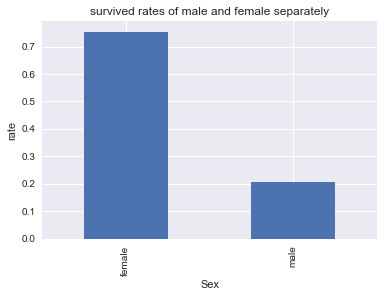

In [9]:
#visualize survived rates
%matplotlib inline
titanic.groupby("Sex")["Survived"].mean().plot.bar(title="survived rates of male and female separately", y="rate").set_ylabel("rate")


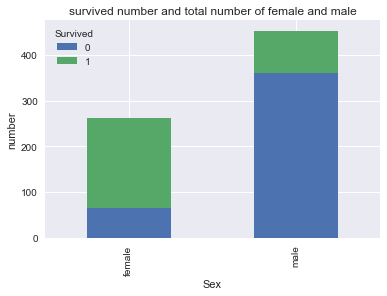

In [10]:
#compare total number with survived number between female and male
titanic.groupby(["Sex", "Survived"])['Survived'].count().unstack().plot.bar(stacked=True, title="survived number and total number of female and male").set_ylabel("number")

## explore the correlation between survival rate and age

In [11]:
#All passengers are divided as child, adult and older according to age.
def age_classify(age):
    if age <= 15:
        return "Child"
    elif 15 < age <= 55:
        return "Adult"
    elif age > 55:
        return "Older"

titanic["Age"] = titanic["Age"].apply(age_classify).dropna()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500


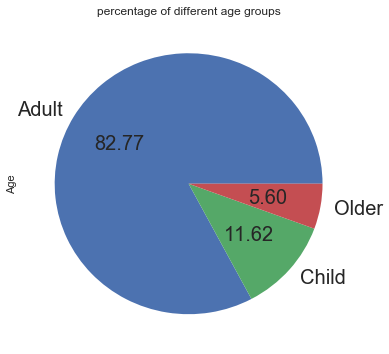

In [12]:
#different age groups' percentage
titanic.groupby("Age")["Age"].count().plot.pie(autopct='%.2f', fontsize=20, figsize=(6, 6), title="percentage of different age groups")

## coclusion: most of passengers are adult

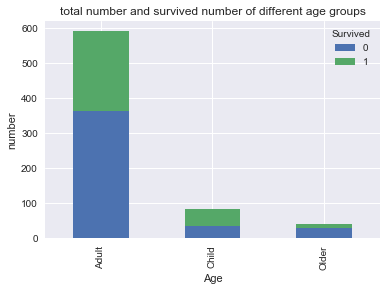

In [13]:
#compare total number with survived number between different age groups
%matplotlib inline
titanic.groupby(["Age", "Survived"])['Survived'].count().unstack().plot.bar(stacked=True, title="total number and survived number of different age groups").set_ylabel("number")

In [14]:
titanic.groupby('Age').sum()['Survived'] / titanic.groupby('Age').size()


Age
Adult    0.387479
Child    0.590361
Older    0.300000
dtype: float64

## explore the correlation between survival rate and pclass

In [15]:
#calculate survival rates of different pclasses
titanic.groupby("Pclass")["Survived"].mean()

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

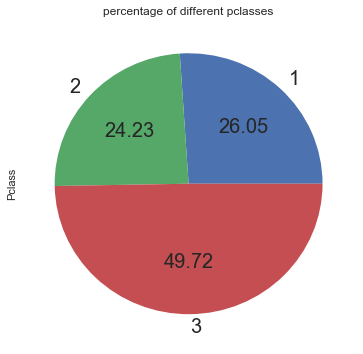

In [16]:
#different pclasses' percentage
titanic.groupby("Pclass")["Pclass"].count().plot.pie(autopct='%.2f', fontsize=20, figsize=(6, 6), title="percentage of different pclasses")

## conclusion: the people in class 3 take up over half of total number and the rest is divived by class 1 and class 2 equally.

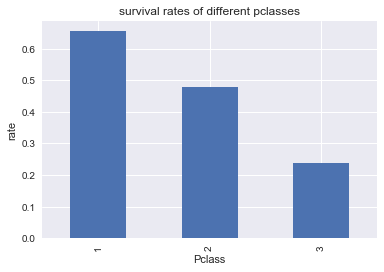

In [17]:
#visualize survival rates of different pclasses
titanic.groupby("Pclass")["Survived"].mean().plot.bar(title="survival rates of different pclasses").set_ylabel("rate")

# Conclusion and restriction

* Females display a higher survival rate. And the reason may be males on titanic are gentlemanly. So, females have higher rescue priority.  But there may be still other factors casuing this trend. For example, most of female are workers on titanic, who are familiar with  emergency equipment and receive professional survival training. Therefore, we need more datas to drill down into.
* Children have highest survival rate. The reason may be that parents try their best to save their childern. In addition, the older's survival rate is lowerst. The result displays that the older's slackening physical condition make it difficult to survive in such a severe accident. However, because of many missing datas in age, it is difficult to draw an accurate conclusion until all datas are received.
* Class 1 has highest survival rate. More safety equipments in class 1 may  cause  this result. However, the gap of survival rates between class 1 and class 2 is not so large that we can gain an accurate conclusion. 